In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [5]:
#Limiting the data to only Mariners players

mariners_data = master_data.loc[master_data["Franchise"] == "Mariners"]

#Only showing players that signed with the Mariners

signed_mariners_data = mariners_data.loc[mariners_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_mariners_data.groupby("Year")

#Unsigned Mariners draft picks

unsigned_mariners_data = mariners_data.loc[mariners_data["Signed"] == "N"]

In [6]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1981    71.3
1991    48.4
1987    43.9
1993    33.8
2006    32.9
2012    31.7
2009    31.5
1982    26.0
1990    25.8
1986    24.5
2010    21.3
1995    20.7
1980    14.9
2003    14.7
1979    13.0
1994    12.1
2011    11.2
1997    11.2
1977    10.8
1984    10.7
1988    10.1
1999     8.4
1998     7.8
1992     7.3
1985     5.8
1978     5.5
2013     5.4
2008     5.3
2014     3.5
1996     3.3
2007     2.1
2004     1.1
2002     0.9
2001     0.3
2018     0.0
2017     0.0
2019     0.0
1989    -0.1
2016    -0.1
2000    -0.4
2005    -0.6
2015    -0.6
1983    -3.3
Name: Total_WAR, dtype: float64

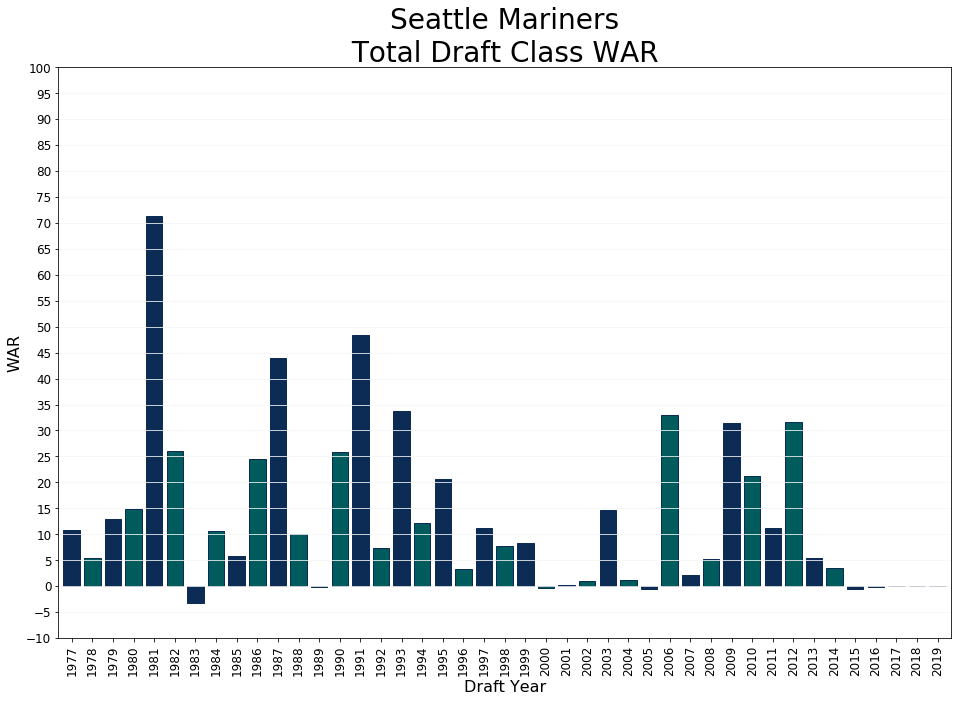

In [7]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#0C2C56", "#005C5C"], width = .8, fontsize = 12, edgecolor = "#0C2C56", figsize = (16, 10.5))
plt.title("Seattle Mariners\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 101, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Mariners WAR Total by Draft Year.png")
plt.show()

In [8]:
#Best draft picks in franchise history

signed_mariners_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
18258,1987,1,1,Mariners,Mariners,Y,Ken Griffey Jr.,1989.0,griffke02,327.0,38.3,0.0,38.3,OF,HS,Archbishop Moeller HS,Cincinnati,OH,More than 25 WAR
26942,1993,1,1,Mariners,Mariners,Y,Alex Rodriguez,1994.0,rodrial01,1274.0,35.0,0.0,35.0,SS,HS,Westminster Christian,Miami,FL,More than 25 WAR
13219,1981,2,35,Mariners,Mariners,Y,Mark Langston,1984.0,langsma01,1007323.0,0.0,27.5,27.5,LHP,4Yr,San Jose State University,San Jose,CA,More than 25 WAR
51735,2009,3,82,Mariners,Mariners,Y,Kyle Seager,2011.0,seageky01,9785.0,26.3,0.0,26.3,2B,4Yr,University of North Carolina at Chapel Hill,Chapel Hill,NC,More than 25 WAR
17402,1986,2,36,Mariners,Mariners,Y,Erik Hanson,1988.0,hansoer01,1005333.0,-0.1,24.6,24.5,RHP,4Yr,Wake Forest University,Winston-Salem,NC,20-25 WAR
13185,1981,1,1,Mariners,Mariners,Y,Mike Moore,1982.0,mooremi01,1009122.0,0.0,24.3,24.3,RHP,4Yr,Oral Roberts University,Tulsa,OK,20-25 WAR
14175,1982,6,138,Mariners,Mariners,Y,Alvin Davis,1984.0,davisal01,1003033.0,22.8,0.0,22.8,1B,4Yr,Arizona State University,Tempe,AZ,20-25 WAR
47395,2006,7,201,Mariners,Mariners,Y,Doug Fister,2009.0,fistedo01,9425.0,0.2,18.3,18.5,RHP,4Yr,California State University Fresno,Fresno,CA,15-20 WAR
22604,1990,6,161,Mariners,Mariners,Y,Mike Hampton,1993.0,hamptmi01,430.0,2.9,14.4,17.3,LHP,HS,Crystal River HS,Crystal River,FL,15-20 WAR
53306,2010,4,132,Mariners,Mariners,Y,James Paxton,2013.0,paxtoja01,11828.0,-0.1,17.1,17.0,LHP,NaN,NaN,NaN,NaN,15-20 WAR


In [9]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_mariners_data.loc[((signed_mariners_data["WAR Group"] == "Less than 5 WAR") |
(signed_mariners_data["WAR Group"] == "No Major League Experience")) & 
(signed_mariners_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
10709,1978,1,6,Mariners,Mariners,Y,Tito Nanni,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Chestnut Hill Academy HS,Willow Grove,PA,No Major League Experience
11483,1979,1,1,Mariners,Mariners,Y,Al Chambers,1983.0,chambal01,1002116.0,-0.5,0.0,-0.5,OF,HS,John Harris HS,Harrisburg,PA,Less than 5 WAR
12358,1980,1,6,Mariners,Mariners,Y,Darnell Coles,1983.0,colesda01,1002436.0,1.4,0.0,1.4,SS,HS,Dwight D. Eisenhower HS,Rialto,CA,Less than 5 WAR
14043,1982,1,6,Mariners,Mariners,Y,Spike Owen,1983.0,owensp01,1009924.0,3.0,0.0,3.0,SS,4Yr,University of Texas at Austin,Austin,TX,Less than 5 WAR
14875,1983,1,7,Mariners,Mariners,Y,Darrel Akerfelds,1986.0,akerfda01,1000096.0,0.0,-2.7,-2.7,RHP,4Yr,Colorado Mesa University,Grand Junction,CO,Less than 5 WAR
14885,1983,1,17,Mariners,Mariners,Y,Terry Bell,1986.0,bellte01,1000822.0,0.0,0.0,0.0,C,4Yr,Old Dominion University,Norfolk,VA,Less than 5 WAR
16541,1985,1,7,Mariners,Mariners,Y,Mike Campbell,1987.0,campbmi01,1001887.0,0.0,0.4,0.4,RHP,4Yr,University of Hawaii at Manoa,Honolulu,HI,Less than 5 WAR
16561,1985,1,27,Mariners,Mariners,Y,Bill McGuire,1988.0,mcguibi01,1008552.0,-0.1,0.0,-0.1,C,4Yr,University of Nebraska-Lincoln,Lincoln,NE,Less than 5 WAR
17374,1986,1,8,Mariners,Mariners,Y,Pat Lennon,1991.0,lennopa01,1007527.0,-0.4,0.0,-0.4,SS,HS,Whiteville HS,Whiteville,NC,Less than 5 WAR
20956,1989,1,3,Mariners,Mariners,Y,Roger Salkeld,1993.0,salkero01,1011384.0,-0.4,0.8,0.4,RHP,HS,Saugus HS,Saugus,CA,Less than 5 WAR


In [10]:
#Best unsigned draft picks in franchise history

unsigned_mariners_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
33617,1996,59,1587,Mariners,Mariners,N,Barry Zito,2000.0,zitoba01,944.0,-0.4,24.2,23.8,LHP,HS,University HS,San Diego,CA,20-25 WAR
37967,1999,38,1145,Mariners,Mariners,N,Rich Harden,2003.0,harderi01,1772.0,-0.2,16.7,16.5,RHP,HS,Claremont Secondary School,Victoria,BC,15-20 WAR
33437,1996,48,1406,Mariners,Mariners,N,Juan Pierre,2000.0,pierrju01,443.0,16.4,0.0,16.4,OF,JC,Galveston College,Galveston,TX,15-20 WAR
31186,1995,30,818,Mariners,Mariners,N,Juan Pierre,2000.0,pierrju01,443.0,16.4,0.0,16.4,OF,HS,Alexandria HS,Alexandria,LA,15-20 WAR
30195,1994,61,1534,Mariners,Mariners,N,Morgan Ensberg,2000.0,ensbemo01,556.0,15.3,0.0,15.3,SS,HS,Redondo Beach HS,Redondo Beach,CA,15-20 WAR
45866,2005,6,173,Mariners,Mariners,N,Lance Lynn,2011.0,lynnla01,2520.0,-1.0,14.2,13.2,RHP,HS,Brownsburg HS,Brownsburg,IN,10-15 WAR
14796,1982,31,760,Mariners,Mariners,N,Lance Johnson,1987.0,johnsla03,1006482.0,12.7,0.0,12.7,OF,JC,Triton College,River Grove,IL,10-15 WAR
38982,2000,23,686,Mariners,Mariners,N,Jason Hammel,2006.0,hammeja01,4538.0,-0.7,10.8,10.1,RHP,HS,South Kitsap HS,Port Orchard,WA,10-15 WAR
10344,1977,16,416,Mariners,Mariners,N,Tony Phillips,1982.0,phillto02,1010300.0,10.0,0.0,10.0,SS,HS,Roswell HS,Roswell,GA,10-15 WAR
11977,1979,20,495,Mariners,Mariners,N,Tom Henke,1982.0,henketo01,1005649.0,0.0,9.7,9.7,RHP,4Yr,Texas State University,San Marcos,TX,5-10 WAR


In [11]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_mariners_data.loc[signed_mariners_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
34143,1997,12,373,Mariners,Mariners,Y,Joel Pineiro,2000.0,pineijo01,1094.0,-0.2,11.8,11.6,RHP,JC,Florida SouthWestern State College,Fort Myers,FL,10-15 WAR
11899,1979,17,417,Mariners,Mariners,Y,Bud Black,1981.0,blackbu02,1001007.0,0.0,10.4,10.4,LHP,4Yr,San Diego State University,San Diego,CA,10-15 WAR
24508,1991,22,578,Mariners,Mariners,Y,Darren Bragg,1994.0,braggda01,83.0,8.4,0.0,8.4,OF,4Yr,Georgia Institute of Technology,Atlanta,GA,5-10 WAR
44528,2004,11,333,Mariners,Mariners,Y,Michael Saunders,2009.0,saundmi01,9981.0,6.0,0.0,6.0,RHP,HS,Lambrick Park SS,Victoria,BC,5-10 WAR
31046,1995,25,678,Mariners,Mariners,Y,Brian Fuentes,2001.0,fuentbr01,429.0,0.0,4.9,4.9,LHP,JC,Merced College,Merced,CA,Less than 5 WAR
26171,1992,23,642,Mariners,Mariners,Y,Ryan Franklin,1999.0,frankry01,1076.0,0.0,4.4,4.4,RHP,JC,Seminole Community College,Sanford,FL,Less than 5 WAR
12669,1980,13,317,Mariners,Mariners,Y,Ed Vande Berg,1982.0,vandeed01,1013348.0,0.0,3.5,3.5,LHP,4Yr,Arizona State University,Tempe,AZ,Less than 5 WAR
24586,1991,25,656,Mariners,Mariners,Y,Matt Mantei,1995.0,mantema01,64.0,0.0,2.9,2.9,RHP,HS,River Valley HS,Three Oaks,MI,Less than 5 WAR
49101,2007,13,405,Mariners,Mariners,Y,Shawn Kelley,2009.0,kellesh01,7773.0,0.0,2.7,2.7,RHP,4Yr,Austin Peay State University,Clarksville,TN,Less than 5 WAR
26535,1992,36,1006,Mariners,Mariners,Y,Raul Ibanez,1996.0,ibanera01,607.0,2.3,0.0,2.3,OF,JC,Miami-Dade College,Miami,FL,Less than 5 WAR


In [12]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(mariners_data["Year"], mariners_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1977,53.1,40.6,6.2
1978,56.5,39.1,4.3
1979,64.7,35.3,0.0
1980,69.6,26.1,4.3
1981,77.8,22.2,0.0
1982,64.7,23.5,11.8
1983,80.0,20.0,0.0
1984,90.0,10.0,0.0
1985,77.4,22.6,0.0


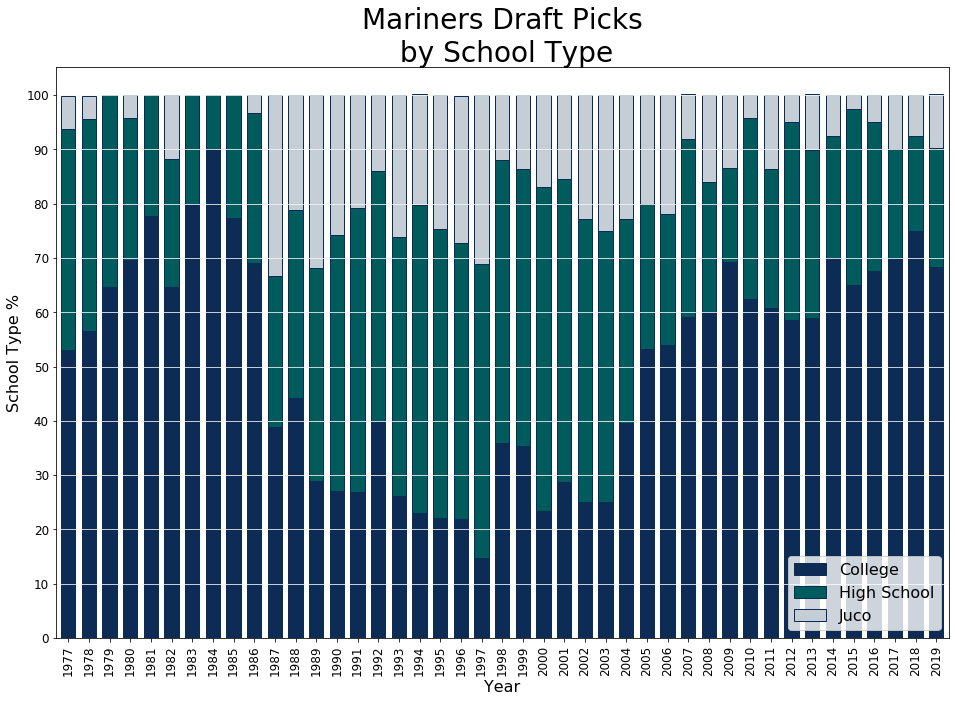

In [13]:
#Bar chart of table above

colors = ["#0C2C56", "#005C5C", "#C4CED4"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#0C2C56", stacked = True, figsize = (16, 10.5))
plt.title("Mariners Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Mariners Draft Picks by School Type.png")
plt.show()